### Jasmine Dumas (1523905)
### CSC 478: Programming Machine Learning Applications - Autumn 2016
### [Assignment #2](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/assign2.htmll)
### Due: Thursday, October 13, 2016

In [226]:
## load libraries
import sys
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [227]:
pwd

'/Users/jasminedumas/Desktop/depaul/CSC478/jupyterhw_2'

### 1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]

   **A. Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.**

In [228]:
def knn_classify(x, D, L, K, measure):
    if measure == 0: # euclidean
        dists = sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1: # cosine
        D_norm = array([linalg.norm(D[i]) for i in range(len(D))])
        x_norm = linalg.norm(x)
        cosines = dot(D,x)/(D_norm * x_norm)
        dists = 1 - cosines
    idx = argsort(dists)
    count={}          
    for i in range(K):
        vote = L[idx[i]]
        count[vote] = count.get(vote,0) + 1
    sortedClass = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClass[0][0], idx[:K]

**B. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.**

In [229]:
def classAccuracy(A, x, D, L, K, measure):
    numLabels = len(A)
    errorCount = 0.0
    for i in range(numLabels):
        classifierResult, neigh_idx = knn_classify(x[i,:], D, L, K, measure)
        #print "the classifier result: %s, the real answer is: %s" % (classifierResult, labels[i])
        if (classifierResult != A[i]): errorCount += 1.0
    errorRate = errorCount/float(numLabels)
    #print "the total error rate is %f" % (errorCount/float(numLabels))
    #print "total error: %d/%d" % (errorCount, numLabels)
    return errorRate

**C. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].**

In [230]:
TD = np.genfromtxt('newsgroups/trainMatrixModified.txt',delimiter='\t',dtype=float)
labels = np.genfromtxt('newsgroups/trainClasses.txt',delimiter='\t',usecols=(1),dtype=int)
DT = TD.T

testTD = np.genfromtxt('newsgroups/testMatrixModified.txt',delimiter='\t',dtype=float)
testLabels = np.genfromtxt('newsgroups/testClasses.txt',delimiter='\t',usecols=(1),dtype=int)
testDT = testTD.T

result = np.zeros((20,3), dtype=float)
for i in range(0,20):
    errorRateEuc = classAccuracy(testLabels, testDT, DT, labels, i+1, 0)
    errorRateCos = classAccuracy(testLabels, testDT, DT, labels, i+1, 1)
    result[i] = [i+1, errorRateEuc, errorRateCos]
    
print("Resultant data set")
print(" K  Euclid  Cosine")
for row in result:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

Resultant data set
 K  Euclid  Cosine
 1   0.22    0.01
 2   0.21    0.04
 3   0.19    0.03
 4   0.23    0.04
 5   0.18    0.03
 6   0.26    0.02
 7   0.23    0.02
 8   0.27    0.03
 9   0.25    0.03
10   0.29    0.03
11   0.20    0.02
12   0.28    0.03
13   0.23    0.02
14   0.26    0.03
15   0.21    0.01
16   0.27    0.03
17   0.24    0.03
18   0.28    0.03
19   0.26    0.03
20   0.29    0.03


**D. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.**

In [231]:
allTD = np.concatenate((TD, testTD), axis=1)
DF = np.array([(allTD!=0).sum(1)]).T
NDocs = len(allTD[0,:])
NMatrix = np.ones(np.shape(allTD), dtype=float)*NDocs
IDF = log2(divide(NMatrix, DF))
TD_tfidf = allTD * IDF

In [232]:
tpercent = 0.8
DT_tfidf = TD_tfidf.T
tsize = tpercent * len(DT_tfidf)
trainDT_tfidf = DT_tfidf[:tsize,:]
testDT_tfidf = DT_tfidf[tsize:,:]

/Users/jasminedumas/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [233]:
TFxIDF = np.zeros((20,3), dtype=float)
for i in range(0,20):
    errorRateEuc = classAccuracy(testLabels, testDT_tfidf, trainDT_tfidf, labels, i+1, 0)
    errorRateCos = classAccuracy(testLabels, testDT_tfidf, trainDT_tfidf, labels, i+1, 1)
    #print "%2d,  %.2f,   %.2f" % (i, errorRateEuc, errorRateCos)
    TFxIDF[i] = [i+1, errorRateEuc, errorRateCos]

In [234]:
print("TFxIDF data set")
print(" K  Euclid  Cosine")
for row in TFxIDF:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )
print("\nNomal data set")
print(" K  Euclid  Cosine")
for row in result:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

TFxIDF data set
 K  Euclid  Cosine
 1   0.28    0.05
 2   0.26    0.04
 3   0.26    0.03
 4   0.20    0.03
 5   0.20    0.03
 6   0.29    0.02
 7   0.27    0.01
 8   0.35    0.01
 9   0.31    0.01
10   0.38    0.01
11   0.32    0.01
12   0.39    0.01
13   0.35    0.01
14   0.41    0.01
15   0.40    0.01
16   0.41    0.01
17   0.41    0.01
18   0.43    0.01
19   0.37    0.01
20   0.41    0.01

Nomal data set
 K  Euclid  Cosine
 1   0.22    0.01
 2   0.21    0.04
 3   0.19    0.03
 4   0.23    0.04
 5   0.18    0.03
 6   0.26    0.02
 7   0.23    0.02
 8   0.27    0.03
 9   0.25    0.03
10   0.29    0.03
11   0.20    0.02
12   0.28    0.03
13   0.23    0.02
14   0.26    0.03
15   0.21    0.01
16   0.27    0.03
17   0.24    0.03
18   0.28    0.03
19   0.26    0.03
20   0.29    0.03


**E. Create a classifier based on the Rocchio Method adapted for text categorization. Your classifier should take as input the training data matrix, the training labels, and the instance to be classified. It should compute the prototype vectors for each of the categories and measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class and include the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.**

*note enough time for this question*

### 2. Classification using scikit-learn [Dataset: bank_data.csv]

**For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install 
it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.**

In [235]:
# load libraries
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**A. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]**

In [236]:
# load data
bankData = pd.read_csv("bank_data.csv")

In [237]:
# explore the data
bankData.shape

(600, 12)

In [238]:
bankData.head(n=5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [239]:
# remove the target from the entire dataset
X = bankData.drop("pep", axis=1, inplace = False)
y = bankData.pep
X.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage'],
      dtype='object')

In [240]:
# drop the id column like in HW 1
X.drop("id", axis = 1, inplace=True)

In [241]:
# transform the YES/NO factor values into binary responses
X.replace(to_replace = ['YES', 'NO'], value = [1.0, 0.0], inplace=True)

In [242]:
# transform into standard spreadsheet format aka design matrix or model matrix
def model_matrix(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = model_matrix(X, ['gender', 'region'])

In [243]:
# scale the continuous variables use min max calculation
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
X[['age', 'income', 'children']] = Scaler.fit_transform(X[['age', 'income', 'children']])

In [244]:
X.head(n=5)

,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,0.612245,0.215634,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.448980,0.431395,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.673469,0.198933,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.795918,0.783987,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [245]:
from sklearn.cross_validation import train_test_split
# create a 80/20 split for train and test - a stratified sample takes into account the class distribution of the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 17, stratify = y)

**B. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).**

In [246]:
# Running the K-nearest neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

bank_knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
bank_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [247]:
# predict on the test data using the knn model created above
bank_knn.predict(X_test)

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO'], dtype=object)

In [248]:
# R-square from training and test data
rsquared_train = bank_knn.score(X_train, y_train)
rsquared_test = bank_knn.score(X_test, y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.7625
test data R-square
0.591666666667


So the r-squared value shows that the model is not to good and is not generalizable to the test dataset, hence the lower r-squared value

In [249]:
# confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_knn.predict(X_test))

print("The Confusion matrix:\n", knn_confusion_matrix)

The Confusion matrix:
 [[51 14]
 [35 20]]


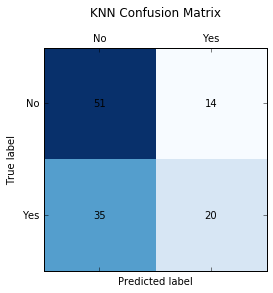

In [250]:
# visualize the confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.matshow(knn_confusion_matrix, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knn_confusion_matrix.shape[0]):
    for x in range(knn_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(knn_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [251]:
#Generate the classification report

from sklearn.metrics import classification_report

knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classify_report)

             precision    recall  f1-score   support

         NO       0.59      0.78      0.68        65
        YES       0.59      0.36      0.45        55

avg / total       0.59      0.59      0.57       120



In [252]:
# computing the average accuracy score and experiment with the k values
##
##
bank_knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAverage Accuracy: ', bank_knn.score(X_test, y_test))


             precision    recall  f1-score   support

         NO       0.65      0.66      0.66        65
        YES       0.59      0.58      0.59        55

avg / total       0.62      0.62      0.62       120
 
Average Accuracy:  0.625


In [253]:
bank_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',
                                metric='euclidean')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAverage Accuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.65      0.69      0.67        65
        YES       0.61      0.56      0.58        55

avg / total       0.63      0.63      0.63       120
 
Average Accuracy:  0.633333333333


In [254]:
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',
                                metric='manhattan')
bank_knn.fit(X_train, y_train)
knn_classif_report = classification_report(y_true = y_test, 
                                           y_pred = bank_knn.predict(X_test))
print(knn_classif_report, '\nAverage Accuracy: ', bank_knn.score(X_test, y_test))

             precision    recall  f1-score   support

         NO       0.66      0.82      0.73        65
        YES       0.70      0.51      0.59        55

avg / total       0.68      0.68      0.67       120
 
Average Accuracy:  0.675


Improvements were seen to the overall acuracy by increasing the k value, but that can be from overfitting the model. 

**C. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?**

In [255]:
from sklearn.tree import DecisionTreeClassifier
# use the defaults
DTree = DecisionTreeClassifier(min_samples_leaf = 10, random_state = 9)
# Build a tree model to the training data
DTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best')

In [256]:
# Check accuracy on the training data
DTree.score(X_train, y_train)

0.89166666666666672

In [257]:
# Check accuracy on the test data
DTree.score(X_test, y_test)

0.875

It is good to see the accuracy for the both the train and test dataset are similar

In [258]:
#Confusion matrix
DTree_confusion_matrix = confusion_matrix(y_true = y_test, 
                                          y_pred = DTree.predict(X_test)) 

print("Confusion matrix:\n", DTree_confusion_matrix)

Confusion matrix:
 [[61  4]
 [11 44]]


In [259]:
DTree_classification_report = classification_report(y_true = y_test,
                                                   y_pred = DTree.predict(X_test))

print(DTree_classification_report)

             precision    recall  f1-score   support

         NO       0.85      0.94      0.89        65
        YES       0.92      0.80      0.85        55

avg / total       0.88      0.88      0.87       120



In [260]:
# naive Bayes (Gaussian) classifier
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [261]:
# Accuracy on training data
naive_bayes.score(X_train ,y_train)

0.66041666666666665

In [262]:
# Accuracy on testing data
naive_bayes.score(X_test ,y_test)

0.59166666666666667

In [263]:
nb_confusion_matrix = confusion_matrix(y_true = y_test, 
                                       y_pred = naive_bayes.predict(X_test))
print("Confusion matrix:\n", nb_confusion_matrix)

Confusion matrix:
 [[49 16]
 [33 22]]


In [264]:
nb_classification_report = classification_report(y_true = y_test, 
                                       y_pred = naive_bayes.predict(X_test))
print(nb_classification_report)

             precision    recall  f1-score   support

         NO       0.60      0.75      0.67        65
        YES       0.58      0.40      0.47        55

avg / total       0.59      0.59      0.58       120



**D. Discuss your observations based on the above experiments.**

Compared to the decision tree model, the naive bayes classifier does not generalizes well to the test dataset indicating that this was not the appropriate model. This could also be from the decision tree not making any assumptions about the error structure of the target variable and the naive bayes being from the gaussian distribution

### 3. Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]

**For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.**

* Preprocessing and data analysis:
    * Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
    * Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.
    * Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.
    * Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [265]:
# get and exploredata
adult = pd.read_csv('adult-modified.csv')

In [266]:
adult.dtypes # data types of each variable

age               object
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [267]:
adult.shape

(10000, 8)

In [268]:
adult.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000
unique,72,4,NaN,2,5,2,NaN,2
top,31,Private,NaN,Single,White,Male,NaN,<=50K
freq,284,6947,NaN,5017,8556,6703,NaN,7621
mean,NaN,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,NaN,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [269]:
adult.head(6)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K


In [270]:
# remove missing categorical instances (work class, marital, race, sex)
clean_adult = adult.dropna()
clean_adult.shape # nothing was dropped as they are encoded with '?'

(10000, 8)

In [271]:
adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [272]:
# impute missing age's to mean age
adult.age[adult['age'] == '?'] = int(adult.age[adult['age'] != '?'].astype(int).mean())
adult.isnull().sum() # so the missing values are in age (numeric) and working-class (categorical)

/Users/jasminedumas/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [273]:
adult.age = adult.age.apply(int)

In [274]:
# drop categorical missing values in work class
clean_adult = adult.replace('?', np.NaN) # replace those missing values 
clean_adult = clean_adult.dropna() # drop those correctly encoded missing values
clean_adult.shape # examine shape to see if it worked!

(9412, 8)

In [275]:
clean_adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

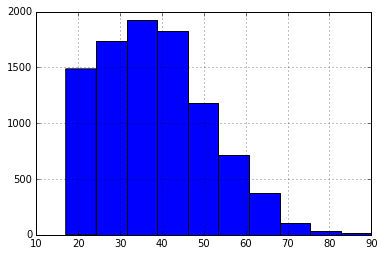

In [276]:
# lets construct some plots to understand the shape and distribution of the attributes
clean_adult['age'].hist()

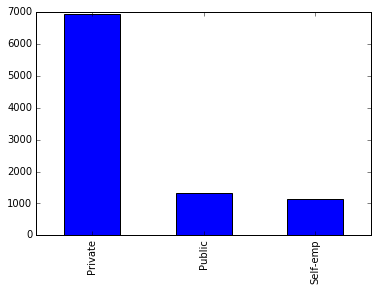

In [277]:
clean_adult['workclass'].value_counts().plot(kind='bar')

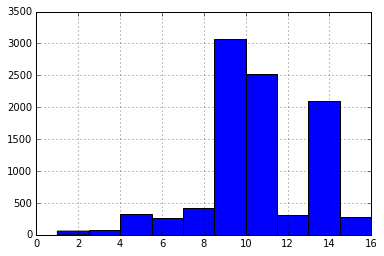

In [278]:
clean_adult['education'].hist()

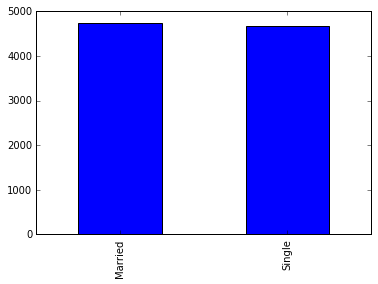

In [279]:
clean_adult['marital-status'].value_counts().plot(kind='bar')

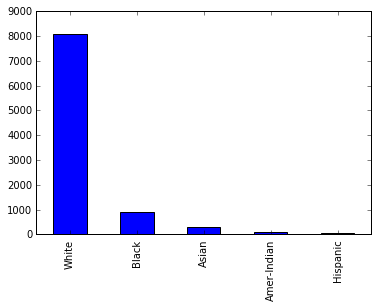

In [280]:
clean_adult['race'].value_counts().plot(kind='bar')

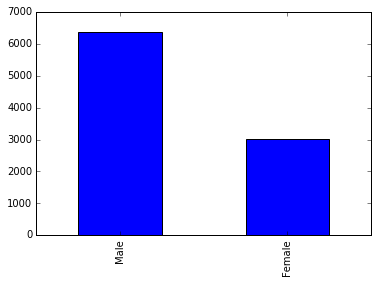

In [281]:
clean_adult['sex'].value_counts().plot(kind='bar')

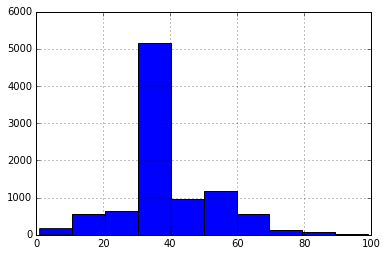

In [282]:
clean_adult['hours-per-week'].hist()

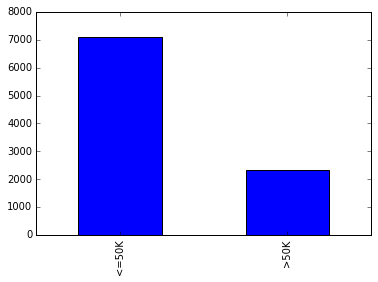

In [283]:
clean_adult['income'].value_counts().plot(kind='bar')

In [284]:
# cross-tabulations (education+race)
er = pd.crosstab(clean_adult.education, clean_adult.race) 
er

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


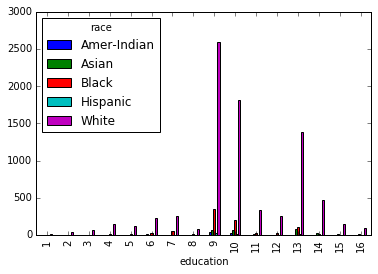

In [285]:
er.plot(kind="bar")

In [286]:
# cross-tabulations (work-class+income)
wi = pd.crosstab(clean_adult.workclass, clean_adult.income)
wi

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


In [287]:
wi.apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
workclass,,
Private,0.783504,0.216496
Public,0.702354,0.297646
Self-emp,0.631533,0.368467


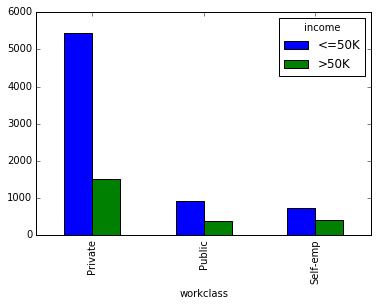

In [288]:
wi.plot(kind='bar')

In [289]:
# cross-tabulations (work-class+race)
wr = pd.crosstab(clean_adult.workclass, clean_adult.race)
wr

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


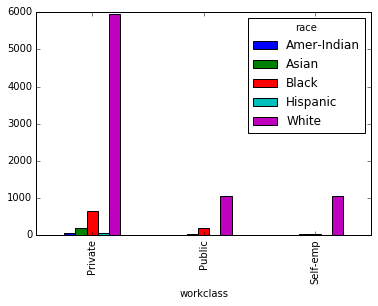

In [290]:
wr.plot(kind='bar')

In [291]:
# cross tabulations (race+income)
ri = pd.crosstab(clean_adult.race, clean_adult.income)
ri

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [292]:
ri.apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
race,,
Amer-Indian,0.902174,0.097826
Asian,0.769759,0.230241
Black,0.866592,0.133408
Hispanic,0.920000,0.080000
White,0.737286,0.262714


In [293]:
# further exploration of income vs. attributes
pd.crosstab(clean_adult.sex, clean_adult.income).apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
sex,,
Female,0.881149,0.118851
Male,0.693091,0.306909


In [294]:
pd.crosstab(clean_adult['marital-status'], clean_adult.income).apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
marital-status,,
Married,0.576314,0.423686
Single,0.933262,0.066738


* For the previous cross tabulation it can be observed for **all** the the races, the majority of the adults surveyed are in the lower-income category of income below 50K 

* Across the other attributes it can be observed that being self-employed yielded a higher percentage of adults with above 50K. A higher percentage of adult males had incomes above 50K, compared to females. More married adults have incomes above 50K (which could be combined from census entry)

------

* Predictive Modeling and Model Evaluation:
    * Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).
    
    * Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.
    
    * [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [295]:
clean_adult = pd.get_dummies(clean_adult)
clean_adult.head(n=5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [296]:
# drop income<=50K
clean_adult = clean_adult.drop('income_<=50K', 1)
clean_adult.head(n=5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,50,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,38,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,53,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [297]:
# seperate target attribute ("income>50K")
target = clean_adult['income_>50K']
target.head(3)

0    0.0
1    0.0
2    0.0
Name: income_>50K, dtype: float64

In [298]:
# drop target from entire clean dataset for training purposes
clean_adult = clean_adult.drop('income_>50K', 1)
clean_adult.head(3)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [299]:
from sklearn import naive_bayes, tree
from sklearn.lda import LDA
from sklearn import cross_validation  

In [300]:
# create a split for predictive modeling
# concurrent split of x's, y, at 30% / 70%
pred_train, pred_test, target_train, target_test = train_test_split(clean_adult, target, test_size=.3)

In [301]:
# Naive Bayes (Gaussian) classifiers
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(pred_train, target_train)
nbpreds_test = nbclf.predict(pred_test)
print (nbpreds_test)

[ 0.  0.  1. ...,  0.  0.  0.]


In [302]:
print (nbclf.score(pred_train, target_train))

0.713114754098


In [303]:
print (nbclf.score(pred_test, target_test))

0.724858356941


In [304]:
# 10-fold cross validation for Naive Bayes
cv_scores = cross_validation.cross_val_score(nbclf, clean_adult, target, cv=10)
cv_scores

array([ 0.73,  0.7 ,  0.73,  0.7 ,  0.73,  0.71,  0.71,  0.72,  0.73,  0.71])

In [305]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


In [306]:
# decision tree (using "entropy" as selection criteria
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(pred_train, target_train)
treepreds_test = treeclf.predict(pred_test)
print (treepreds_test)

[ 0.  1.  1. ...,  0.  0.  1.]


In [307]:
print (treeclf.score(pred_test, target_test))

0.764872521246


In [308]:
print (treeclf.score(pred_train, target_train))

0.930479659988


In [309]:
# 10-fold cross validation for decision tree
cv_scores = cross_validation.cross_val_score(treeclf, clean_adult, target, cv=10)
cv_scores

array([ 0.77,  0.75,  0.78,  0.78,  0.77,  0.76,  0.76,  0.79,  0.77,  0.76])

In [310]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.77 (+/- 0.02)


In [311]:
# linear discriminant analysis (LDA)
ldclf = LDA()
ldclf = ldclf.fit(pred_train, target_train)
ldpreds_test = ldclf.predict(pred_test)
print (ldpreds_test)


[ 0.  0.  1. ...,  0.  0.  1.]


/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [312]:
# score the model to determine how well the model fits the test data using accuracy
print (ldclf.score(pred_train, target_train))

0.807528840316


In [313]:
print (ldclf.score(pred_test, target_test))

0.811968838527


In [314]:
# 10-fold cross validation for LDA
cv_scores = cross_validation.cross_val_score(ldclf, clean_adult, target, cv=10)
cv_scores

/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jasminedumas/anaconda/lib/python3.4/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variabl

array([ 0.81,  0.81,  0.79,  0.82,  0.81,  0.79,  0.8 ,  0.81,  0.82,  0.82])

In [315]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


----
fin.